In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from random import choice
import os
from PIL import Image
%matplotlib inline
#导入库

In [17]:
# 修改默认图形大小
plt.rcParams['figure.figsize'] = [20, 20]
# 修改默认字体大小
plt.rcParams['font.size'] = 12
# 修改默认坐标轴标签的字体
plt.rcParams['axes.labelsize'] = 10

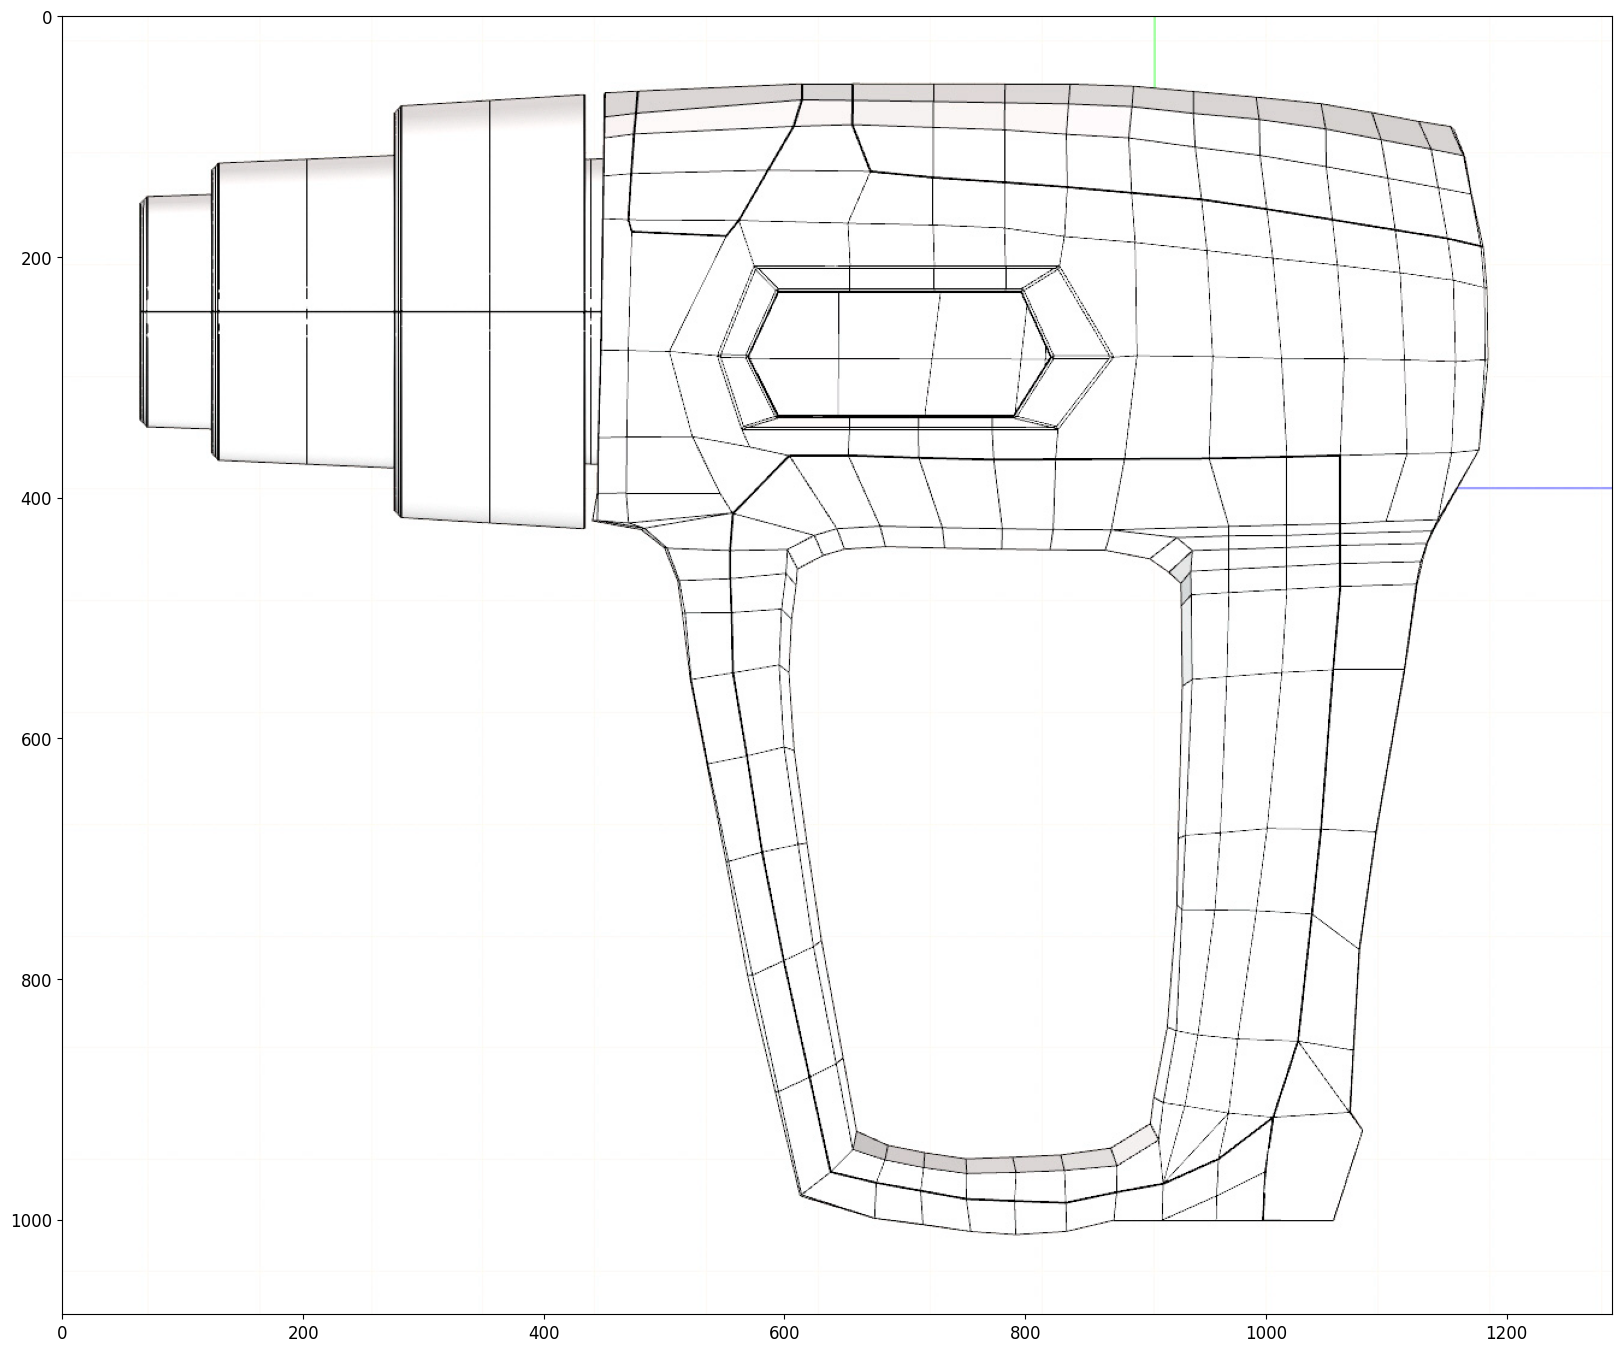

In [33]:
image = cv2.imread('in03.jpg')
# 灰度化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.show()




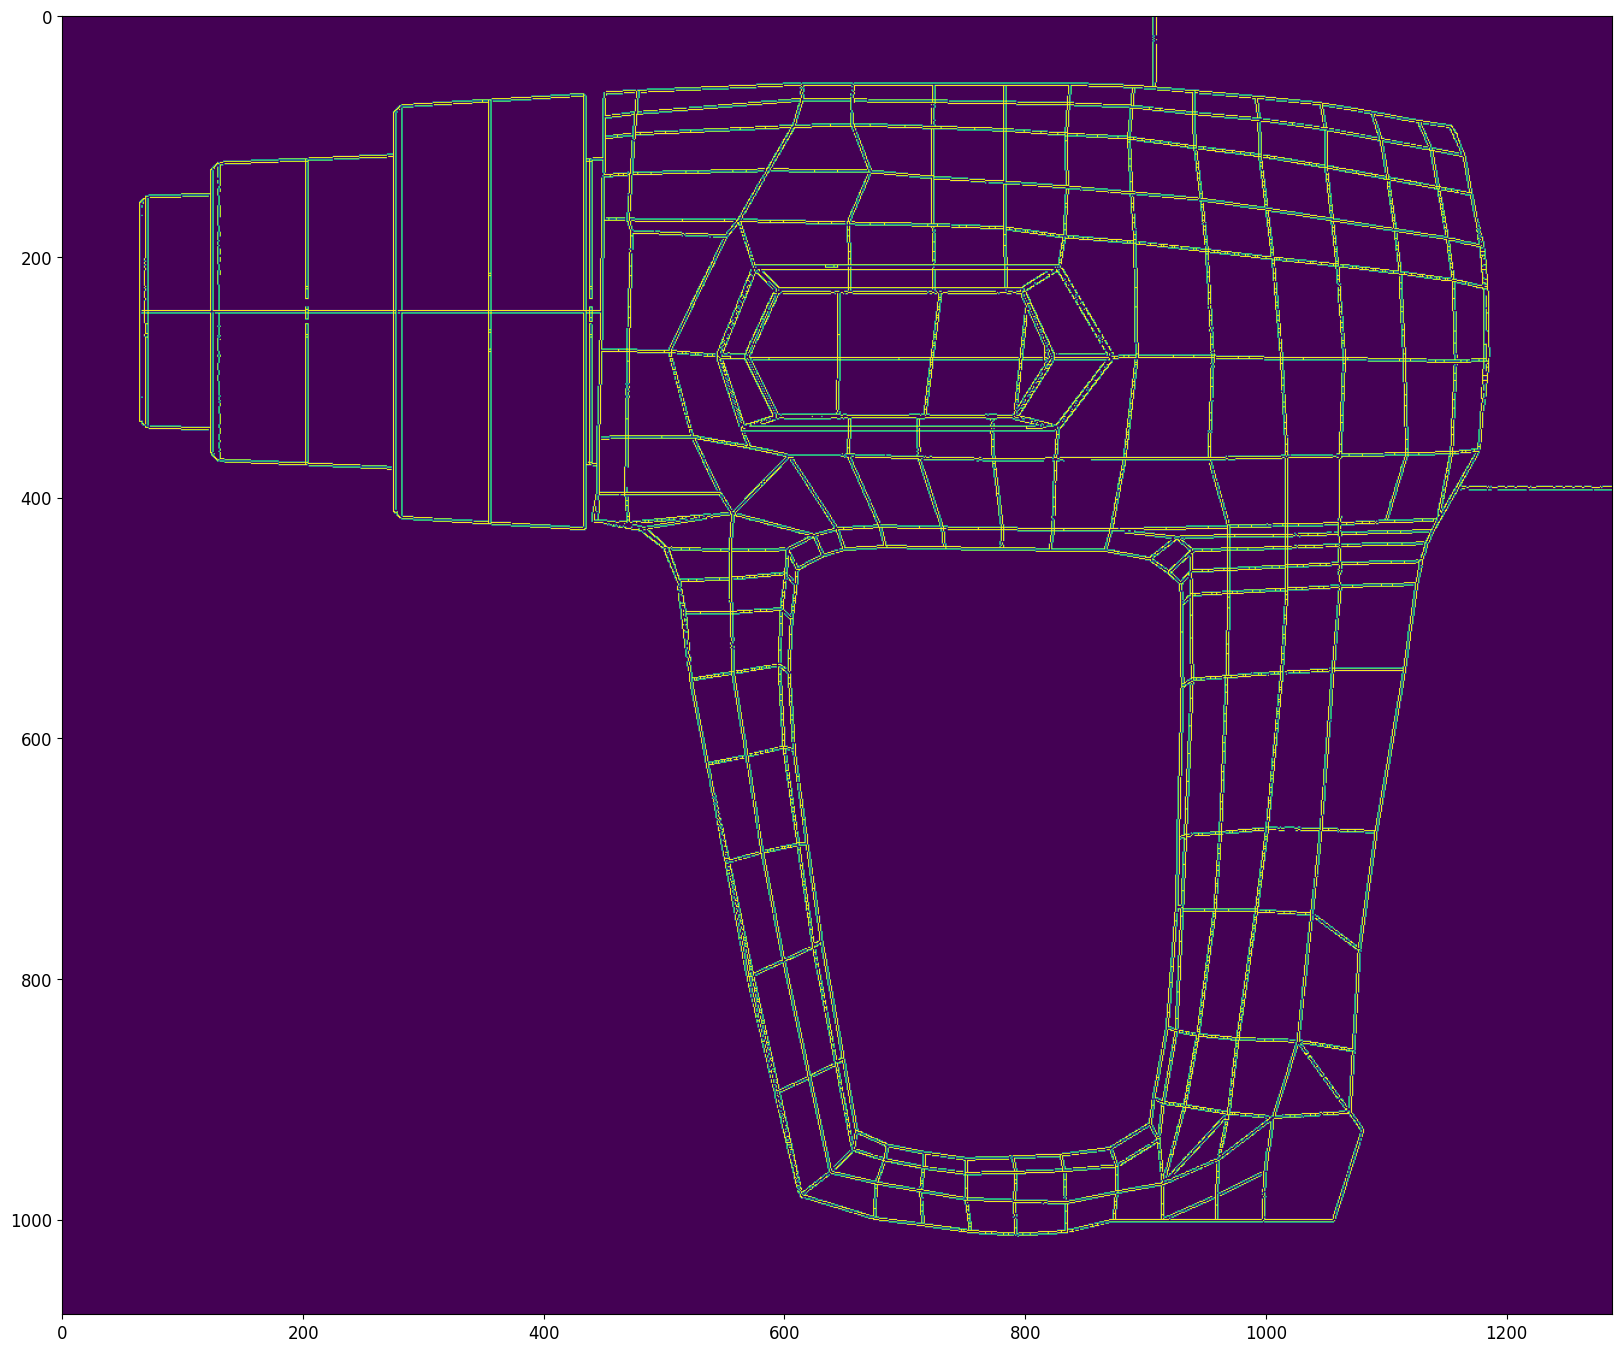

1079
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
# 使用Canny边缘检测
edges = cv2.Canny(gray, 50, 100, apertureSize=3)
plt.imshow(edges)
plt.show()
print(len(edges))
print(edges)


In [35]:
# 使用霍夫变换检测线条
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=5, maxLineGap=5)
print(lines,len(lines))


[[[ 567  284  957  284]]

 [[  64  247  449  247]]

 [[ 435  426  435   67]]

 ...

 [[ 723   92  760   93]]

 [[ 905  448  910  448]]

 [[1049  423 1066  423]]] 758


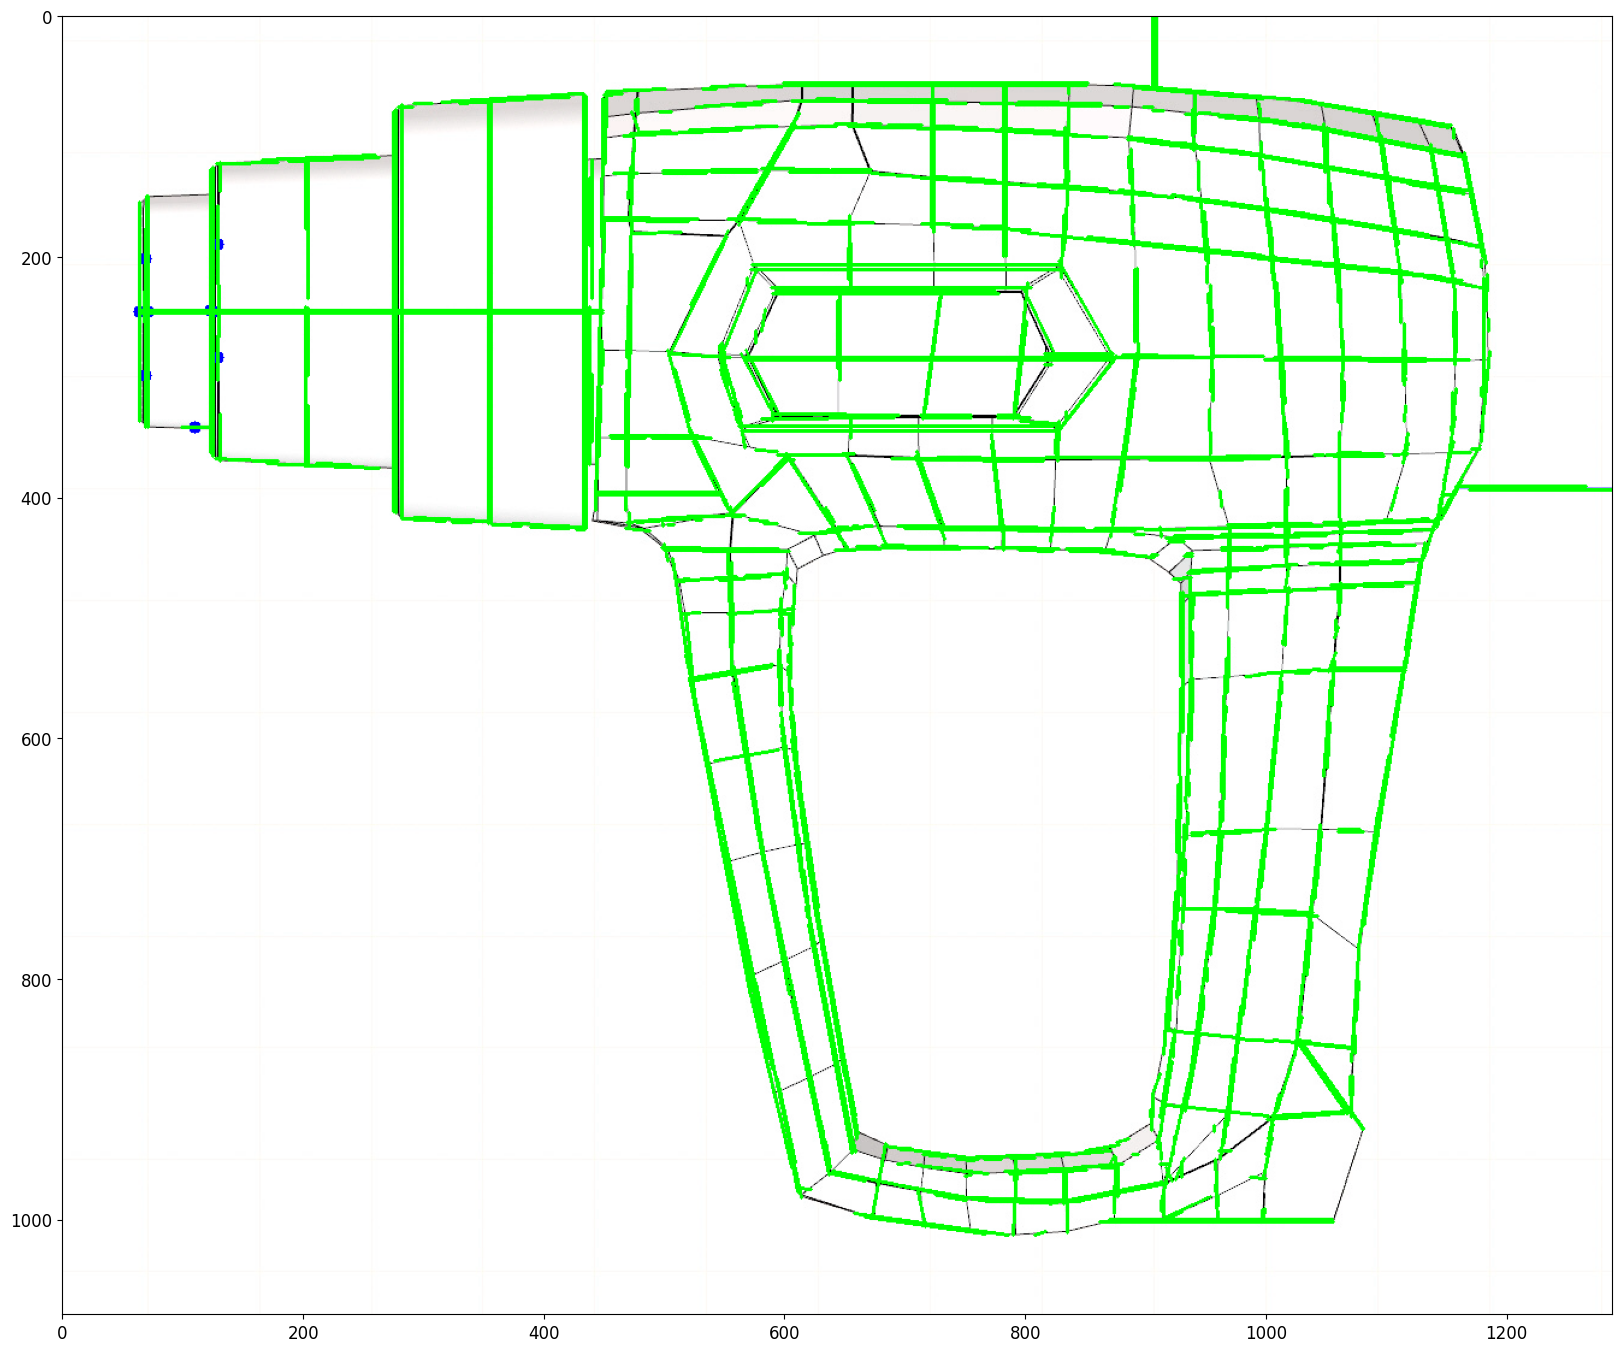

In [36]:


# 找到线的交点作为点的位置
points = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    cx = (x1 + x2) // 2
    cy = (y1 + y2) // 2
    points.append((cx, cy))

# 提取前9个点
points = sorted(points, key=lambda x: (x[0], x[1]))
points = points[:9]

# 将点的数据保存到txt文件
with open('points.txt', 'w') as f:
    for point in points:
        f.write(f'{point[0]}, {point[1]}\n')

# 画出连线并保存连线数据到txt文件
with open('lines.txt', 'w') as f:
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            f.write(f'{points[i][0]}, {points[i][1]}, {points[j][0]}, {points[j][1]}\n')

# 在原始图像上绘制点和连线
for point in points:
    cv2.circle(image, (point[0], point[1]), 5, (0, 0, 255), -1)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 保存标记后的图像
cv2.imwrite('marked_image.jpg', image)

# 显示标记后的图像
plt.imshow(image)
plt.show()
